<div style="background-color: rgba(255, 255, 0, 0.15); padding: 8px;">
Report written by AMORRI Farah, MILANO Olivia, 24/09/2025.
</div>

# Lab 1 : Linear Regression

## G3 SDI - Machine Learning

In this lab, we are going to implement linear regression and ridge regression on a medical data example. The data come from a medical study (Stamey et al., 1989), whose goal was to predict the level of prostate-specific antigen (`lpsa`) from some clinical measurements. These clinical exams are carried out before a possible prostatectomy.

The measurements are log cancer volume `lcavol`, log prostate weight `lweight`, age of the patient `age`, log of benign prostatic hyperplasia amount `lbph`, seminal vesicle invasion `svi`, log of capsular penetration `lcp`, Gleason score `gleason`, and percent of Gleason scores 4 or 5 `pgg45`. The variable `svi` is binary, `gleason` is ordinal, others are quantitative.

### Instructions
* Rename your notebook with your surnames as `lab1_Name1_Name2.ipynb`, and include your names in the notebook.
* Your code, and its output, must be commented !
* Please upload your notebook on Moodle in the dedicated section before the deadline.

In [2]:
# Import usual libraries
import numpy as np
from matplotlib import pyplot as plt

### Part 1 - Linear regression

In this first part, we focus on using linear regression.

**Q1.** Load the data from the `.npy` files included in the archive (use `np.load`). How many examples are there ? How many features ?

In [3]:
X = np.load("data_X.npy")
y = np.load("data_y.npy")

print(X.shape)
print(y.shape)

(97, 8)
(97,)


<div style="background-color: rgba(255, 255, 0, 0.15); padding: 8px;">
Your answer here
</div>

**Q2.** Check whether there are some missing entries in the dataset (both in X and y). Use `np.isnan`.

In [4]:
X_Nan = np.isnan(X)
y_Nan = np.isnan(y)

X_count_nan = np.sum(X_Nan)
y_count_nan = np.sum(y_Nan)

print("---"*30)
print(f"The number of Nan values in X is: {X_count_nan}")
print("\n")
print(f"The number of Nan values in y is: {y_count_nan}")
print("---"*30)


------------------------------------------------------------------------------------------
The number of Nan values in X is: 0


The number of Nan values in y is: 0
------------------------------------------------------------------------------------------


<div style="background-color: rgba(255, 255, 0, 0.15); padding: 8px;">
Your answer here
</div>

**Q3.** Divide the dataset into a training set (80%) and a test set (20%), using `train_test_split` with `random_state = 0` (documentation [here](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)).

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=0)

print("---"*30)
print(f"The number of elements in the training dataset is: {len(X_train)} (expected {np.floor(0.8*X.shape[0])})")
print(f"Number of associated labels: {len(y_train)}")
print("\n")
print(f"The number of elements in the testing dataset is: {len(X_test)} (expected {np.floor(0.2*X.shape[0])})")
print(f"Number of associated labels: {len(y_test)}")
print("---"*30)

------------------------------------------------------------------------------------------
The number of elements in the training dataset is: 77 (expected 77.0)
Number of associated labels: 77


The number of elements in the testing dataset is: 20 (expected 19.0)
Number of associated labels: 20
------------------------------------------------------------------------------------------


**Q4.** Standardize the training set, and apply the same operation to the test set. Use `StandardScaler` (documentation [here](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html)). Recall what standardization means.

In [6]:
from sklearn.preprocessing import StandardScaler

train_scaler = StandardScaler()
test_scaler = StandardScaler()
train_scaler = train_scaler.fit(X_train)
test_scaler = test_scaler.fit(X_test)
X_train_std = train_scaler.transform(X_train)
X_test_std = test_scaler.transform(X_test)

print("---"*30)
print(f"Mean of standardized training dataset (expected 0): {np.mean(X_train_std)}")
print(f"Standard deviation of standardized training dataset (expected 1): {np.std(X_train_std)}")
print("\n")
print(f"Mean of standardized testing dataset (expected 0): {np.mean(X_test_std)}")
print(f"Standard deviation of standardized testing dataset (expected 1): {np.std(X_test_std)}")
print("---"*30)


------------------------------------------------------------------------------------------
Mean of standardized training dataset (expected 0): 4.6139138685720794e-17
Standard deviation of standardized training dataset (expected 1): 1.0


Mean of standardized testing dataset (expected 0): -2.4424906541753446e-16
Standard deviation of standardized testing dataset (expected 1): 1.0
------------------------------------------------------------------------------------------


<div style="background-color: rgba(255, 255, 0, 0.15); padding: 8px;">
Your answer here
</div>

**Q5.** Compute the auto-covariance matrix from the training set, and display it (you might want to use `plt.imshow`). What can we learn from this ?

In [7]:

cov_matrix = np.cov(X_train_std, rowvar=False)

# import matplotlib.pyplot as plt
# plt.title("Auto-covariance matrix (Training set)")
# plt.imshow(cov_matrix)
# plt.show()

import plotly.express as px

fig = px.imshow(cov_matrix, labels={'x':'X axis', 'y':'Y axis', 'color':'Value'})
fig.update_layout(title="Auto-covariance matrix (Training set)")
fig.show()

<div style="background-color: rgba(255, 255, 0, 0.15); padding: 8px;">
Your answer here
</div>

**Q6.** We are now going to train the linear regression model using scikit-learn (check the documentation [here](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)). Use the `.fit` method on the training set. Retrieve the coefficients obtained by scikit-learn using the attributes `.intercept_` and `.coef_`, and check that it corresponds to the closed-form solution from the lecture (you might want to use `np.hstack` to concatenate X with a column of ones).

The score on the train set is: 68.02%


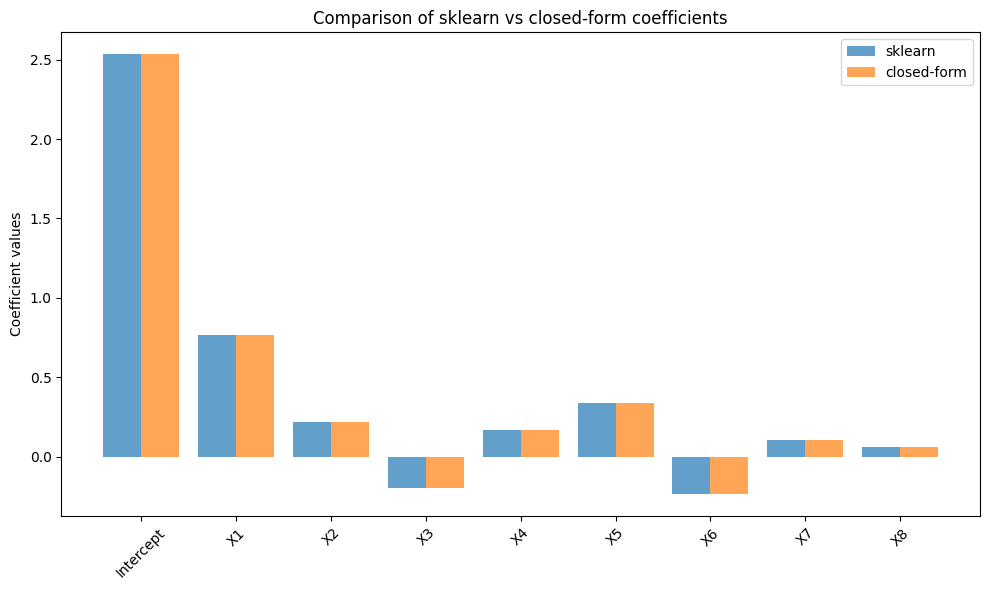

In [29]:
from sklearn.linear_model import LinearRegression


reg = LinearRegression().fit(X_train_std, y_train)
coefficients = reg.coef_
interception = reg.intercept_
coeffs_sklearn = np.hstack([interception, coefficients])

score = reg.score(X_train_std, y_train)
print(f"The score on the train set is: {score:.2%}")


X_augmented = np.hstack([np.ones((X_train_std.shape[0], 1)), X_train_std])
beta_hat = np.linalg.inv(X_augmented.T @ X_augmented) @ X_augmented.T @ y_train



x_names = ["Intercept"] + [f"X{i}" for i in range(1, len(coefficients)+1)]
x = np.arange(len(x_names))


plt.figure(figsize=(10,6))
plt.bar(x - 0.2, coeffs_sklearn, width=0.4, label="sklearn", alpha=0.7)
plt.bar(x + 0.2, beta_hat, width=0.4, label="closed-form", alpha=0.7)
plt.xticks(x, x_names, rotation=45)
plt.ylabel("Coefficient values")
plt.title("Comparison of sklearn vs closed-form coefficients")
plt.legend()
plt.tight_layout()
plt.show()



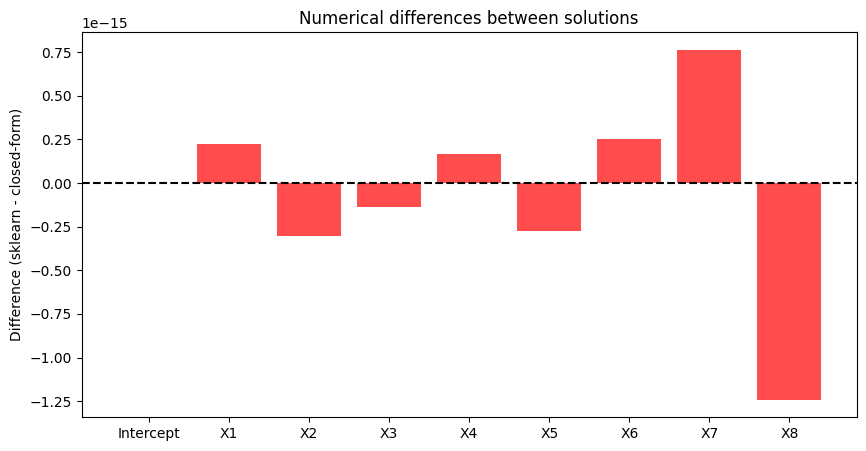

In [30]:
diffs = coeffs_sklearn - beta_hat

plt.figure(figsize=(10,5))
plt.bar(x_names, diffs, color="red", alpha=0.7)
plt.axhline(0, color="black", linestyle="--")
plt.ylabel("Difference (sklearn - closed-form)")
plt.title("Numerical differences between solutions")
plt.show()

<div style="background-color: rgba(255, 255, 0, 0.15); padding: 8px;">
Your answer here
</div>

**Q7.** Obtain the model predictions on the test set using the `.predict` method. Then compute the MSE and the MAE (you may want to use the functions below).

In [49]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

predictions = reg.predict(X_test_std)

# calcul des métriques
mae_linear = mean_absolute_error(y_test, predictions)
mse_linear = mean_squared_error(y_test, predictions)


print(f"MAE  : {mae_linear:.4f}")
print(f"MSE  : {mse_linear:.4f}")


MAE  : 0.6262
MSE  : 0.5604


### Part 2 - Ridge regression

In this second part, we now turn to ridge regression.

**Q1.** Fit the ridge regression model (documentation [here](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html)) with $\lambda = 1$, using the `.fit` method on the training set. Again, retrieve the coefficients, and check that they match with the closed-form solution from the lecture. How do they differ from the ones obtained with linear regression ?

In [36]:
from sklearn.linear_model import Ridge

ridge_reg = Ridge(alpha=1)
ridge_reg.fit(X_train_std, y_train)
coef_ridge = ridge_reg.coef_
intercept_ridge = ridge_reg.intercept_

coeffs_sklearn_ridge = np.hstack([intercept_ridge, coef_ridge])

print("Intercept (ridge):", intercept_ridge)
print("Coefficients (ridge):", coef_ridge)


lmbda = 1.0  

X_augmented = np.hstack([np.ones((X_train_std.shape[0], 1)), X_train_std])
n_features = X_augmented.shape[1]

I = np.eye(n_features)


I[0,0] = 0  
beta_hat_ridge = np.linalg.inv(X_augmented.T @ X_augmented + lmbda * I) @ X_augmented.T @ y_train

intercept_ridge_closed = beta_hat_ridge[0]
coefficients_ridge_closed = beta_hat_ridge[1:]

print("Intercept (closed-form ridge):", intercept_ridge_closed)
print("Coefficients (closed-form ridge):", coefficients_ridge_closed)



Intercept (ridge): 2.5333575454545456
Coefficients (ridge): [ 0.74219288  0.21604499 -0.18971641  0.16549832  0.32885721 -0.20975118
  0.102791    0.05942405]
Intercept (closed-form ridge): 2.5333575454545456
Coefficients (closed-form ridge): [ 0.74219288  0.21604499 -0.18971641  0.16549832  0.32885721 -0.20975118
  0.102791    0.05942405]


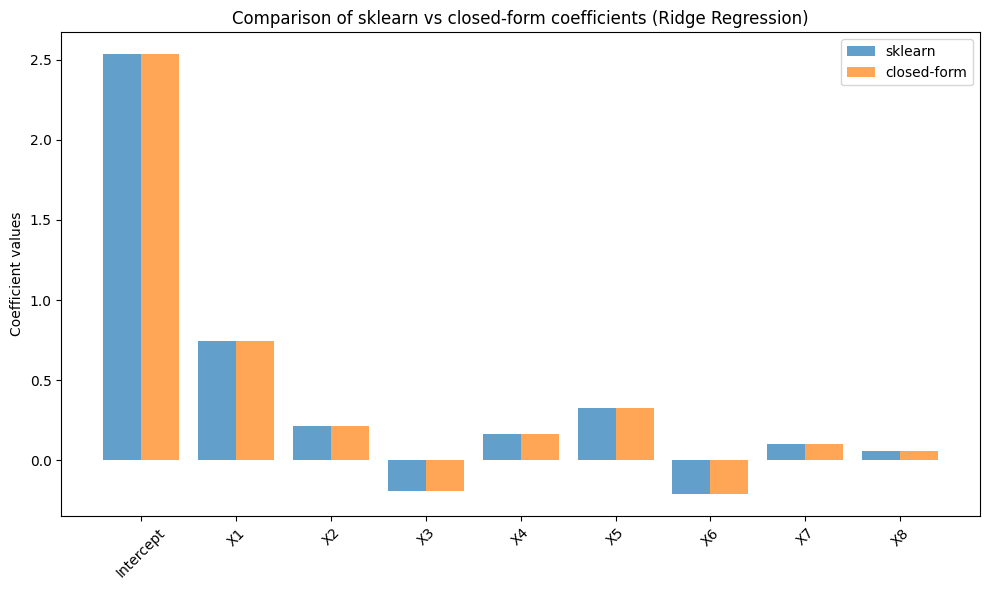

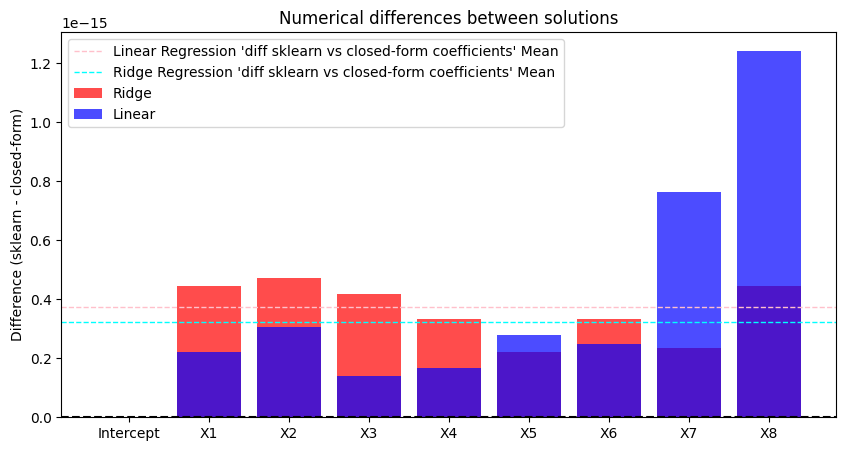

In [48]:
x_ridge_names = ["Intercept"] + [f"X{i}" for i in range(1, len(coeffs_sklearn_ridge))]
x_ridge = np.arange(len(x_ridge_names))


plt.figure(figsize=(10,6))
plt.bar(x_ridge - 0.2, coeffs_sklearn_ridge, width=0.4, label="sklearn", alpha=0.7)
plt.bar(x_ridge + 0.2, beta_hat_ridge, width=0.4, label="closed-form", alpha=0.7)
plt.xticks(x_ridge, x_ridge_names, rotation=45)
plt.ylabel("Coefficient values")
plt.title("Comparison of sklearn vs closed-form coefficients (Ridge Regression)")
plt.legend()
plt.tight_layout()
plt.show()


diffs_ridge = coeffs_sklearn_ridge - beta_hat_ridge

linear_mean = np.mean(np.abs(diffs))
ridge_mean = np.mean(np.abs(diffs_ridge))

plt.figure(figsize=(10,5))
plt.bar(x_ridge_names, np.abs(diffs_ridge), color="red", alpha=0.7, label="Ridge")
plt.bar(x_names,np.abs(diffs), color = "blue", alpha=0.7, label= "Linear")
plt.axhline(y=linear_mean, color="pink", linestyle="dashed", linewidth=1, label="Linear Regression 'diff sklearn vs closed-form coefficients' Mean")
plt.axhline(y=ridge_mean, color="cyan", linestyle="dashed", linewidth=1, label="Ridge Regression 'diff sklearn vs closed-form coefficients' Mean")

plt.axhline(0, color="black", linestyle="--")
plt.ylabel("Difference (sklearn - closed-form)")
plt.title("Numerical differences between solutions")
plt.legend()
plt.show()

<div style="background-color: rgba(255, 255, 0, 0.15); padding: 8px;">
Your answer here
</div>

**Q2.** Obtain the model predictions on the test set using the `.predict` method, then compute the MSE and the MAE. Do we get better or worse predictions than before ? Comment.

In [51]:
y_pred_ridge = ridge_reg.predict(X_test_std)


mse_ridge = mean_squared_error(y_test, y_pred_ridge)
mae_ridge = mean_absolute_error(y_test, y_pred_ridge)



print(f"MSE (Ridge): {mse_ridge:.4f}")
print(f"MAE (Ridge): {mae_ridge:.4f}")

print("- - "*30)
print(f"MSE (Linear)  : {mse_linear:.4f}")
print(f"MAE (Linear) : {mae_linear:.4f}")


MSE (Ridge): 0.5467
MAE (Ridge): 0.6231
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
MSE (Linear)  : 0.5604
MAE (Linear) : 0.6262


<div style="background-color: rgba(255, 255, 0, 0.15); padding: 8px;">
Your answer here
</div>

**Q3.** We are now going to assess the impact of the regularization coefficient $\lambda$.

To do so, vary $\lambda$ from $10^{-3}$ and $10^3$ (use `np.logspace`), and for each value of $\lambda$, retrain the ridge regression model and keep the values of the coefficients (ignoring the intercept).

Display the evolution of the coefficients w.r.t. $\lambda$ (use a logarithmic scale for the x-axis). Comment.

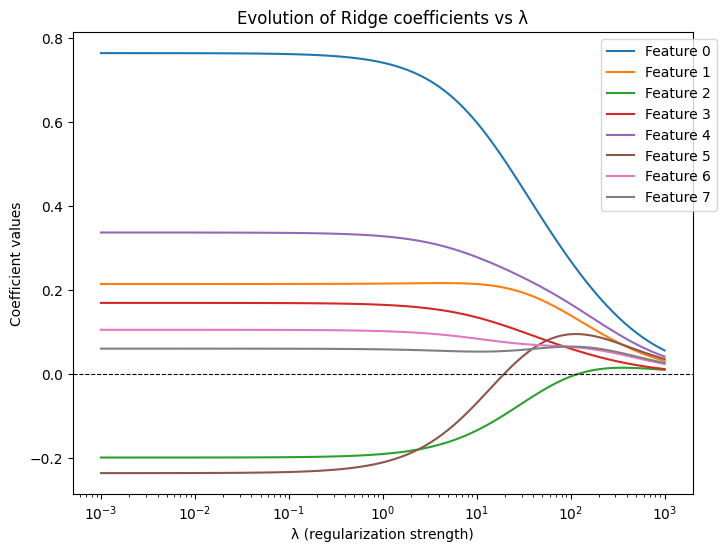

In [13]:
lambdas = np.logspace(-3, 3, 100)

coefs = []

for l in lambdas:
    ridge = Ridge(alpha=l)
    ridge.fit(X_train_std, y_train)
    coefs.append(ridge.coef_)

coefs = np.array(coefs)

plt.figure(figsize=(8,6))
for i in range(coefs.shape[1]):   # chaque feature
    plt.plot(lambdas, coefs[:, i], label=f"Feature {i}")

plt.xscale("log")  # échelle log sur l’axe des x
plt.xlabel("λ (regularization strength)")
plt.ylabel("Coefficient values")
plt.title("Evolution of Ridge coefficients vs λ")
plt.axhline(0, color='black', linewidth=0.8, linestyle="--")
plt.legend(loc="best", bbox_to_anchor=(1.05,1))
plt.show()

<div style="background-color: rgba(255, 255, 0, 0.15); padding: 8px;">
Your answer here
</div>

**Q4.** Now remains the question of choosing the optimal $\lambda$. We are going to select it with a 5-fold cross-validation.

Display the evolution of the cross-validated MSE w.r.t. $\lambda$ (use again a logarithmic scale for the x-axis), and display the best $\lambda$ with a `plt.axvline`.

Now retrain the ridge regression model with the selected $\lambda$, and assess its performance in terms of MSE and MAE. Comment.

Best λ: 2.6826957952797246


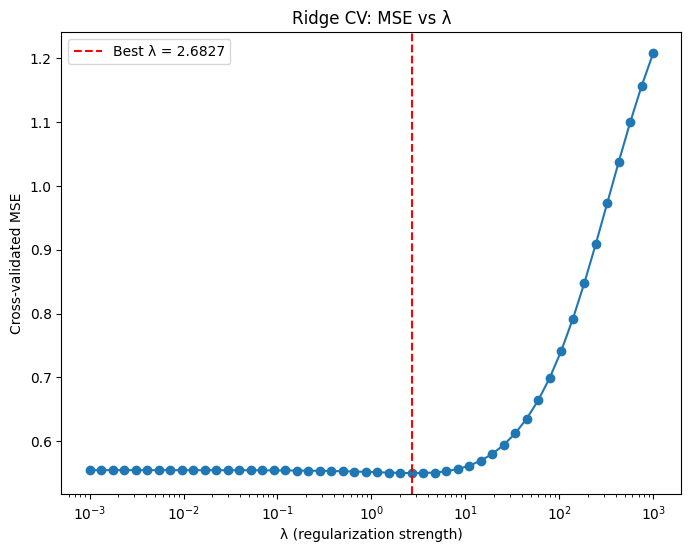

Test MSE (ridge, best λ): 0.5280
Test MAE (ridge, best λ): 0.6185


In [62]:
from sklearn.model_selection import KFold

# Set-up cross-validation
kf = KFold(n_splits=5)
# kf = KFold(n_splits=5, shuffle=True, random_state=42)

# for train_index, val_index in kf.split(X_train):
#     X_train_new, X_val = X_train[train_index], X_train[val_index]
#     y_train_new, y_val = y_train[train_index], y_train[val_index]

mse_means = []

for l in lambdas:
    mse_folds = []
    for train_index, val_index in kf.split(X_train_std):
        X_train_new, X_val = X_train_std[train_index], X_train_std[val_index]
        y_train_new, y_val = y_train[train_index], y_train[val_index]

        ridge = Ridge(alpha=l)
        ridge.fit(X_train_new, y_train_new)
        y_val_pred = ridge.predict(X_val)

        mse_folds.append(mean_squared_error(y_val, y_val_pred))

    # moyenne des MSE sur les folds
    mse_means.append(np.mean(mse_folds))

mse_means = np.array(mse_means)

# Trouver le λ optimal
best_lambda = lambdas[np.argmin(mse_means)]
print("Best λ:", best_lambda)

# Tracer la courbe MSE vs λ
plt.figure(figsize=(8,6))
plt.plot(lambdas, mse_means, marker="o")
plt.xscale("log")
plt.xlabel("λ (regularization strength)")
plt.ylabel("Cross-validated MSE")
plt.title("Ridge CV: MSE vs λ")
plt.axvline(best_lambda, color="red", linestyle="--", label=f"Best λ = {best_lambda:.4f}")
plt.legend()
plt.show()

# Réentraîner avec le meilleur λ sur tout le train set
ridge_best = Ridge(alpha=best_lambda)
ridge_best.fit(X_train_std, y_train)

# Évaluer sur le test set
y_test_pred = ridge_best.predict(X_test_std)
mse_test = mean_squared_error(y_test, y_test_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)

print(f"Test MSE (ridge, best λ): {mse_test:.4f}")
print(f"Test MAE (ridge, best λ): {mae_test:.4f}")
    

### Part 3 (Bonus) - LASSO

Display the same kind of plots as in Part 2, but using LASSO regression instead of ridge regression (see [here](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html). In particular, comment on the following points :
* Do the regression coefficients evolve in the same way as ridge regression ? What kind of solutions do we obtain ?
* Do we get the same optimal lambda ?

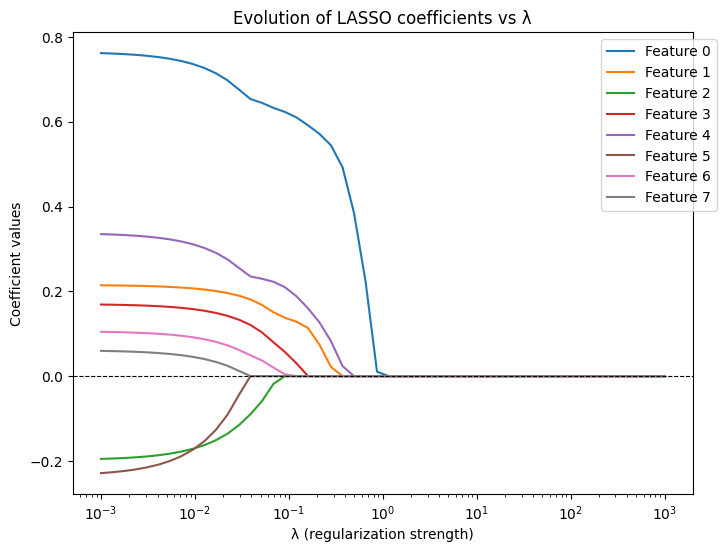

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import KFold

# Grille de λ
lambdas = np.logspace(-3, 3, 50)

# Stocker les coefficients
coefs_lasso = []

for l in lambdas:
    lasso = Lasso(alpha=l, max_iter=10000)  # max_iter ↑ pour convergence
    lasso.fit(X_train_std, y_train)
    coefs_lasso.append(lasso.coef_)

coefs_lasso = np.array(coefs_lasso)

# Tracer l’évolution des coefficients
plt.figure(figsize=(8,6))
for i in range(coefs_lasso.shape[1]):
    plt.plot(lambdas, coefs_lasso[:, i], label=f"Feature {i}")

plt.xscale("log")
plt.xlabel("λ (regularization strength)")
plt.ylabel("Coefficient values")
plt.title("Evolution of LASSO coefficients vs λ")
plt.axhline(0, color="black", linewidth=0.8, linestyle="--")
plt.legend(loc="best", bbox_to_anchor=(1.05,1))
plt.show()


Best λ (LASSO): 0.009540954763499945


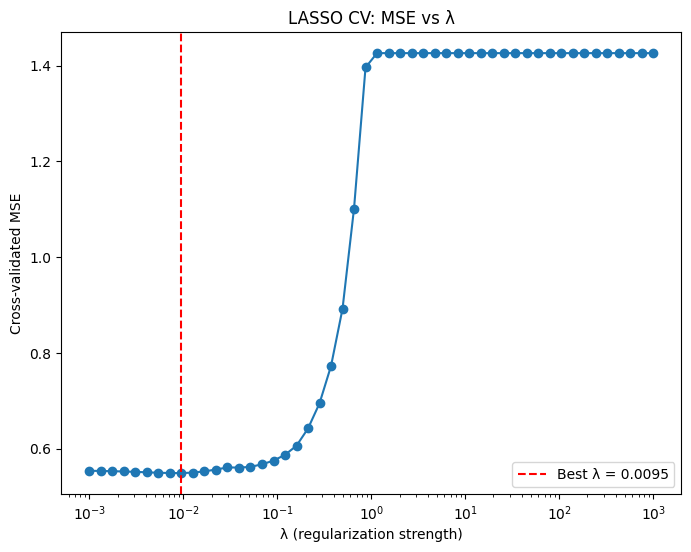

Test MSE (lasso, best λ): 0.5405
Test MAE (lasso, best λ): 0.6204


In [61]:
# kf = KFold(n_splits=5, shuffle=True, random_state=42)
kf = KFold(n_splits=5)
mse_means_lasso = []

for l in lambdas:
    mse_folds = []
    for train_index, val_index in kf.split(X_train_std):
        X_train_new, X_val = X_train_std[train_index], X_train_std[val_index]
        y_train_new, y_val = y_train[train_index], y_train[val_index]

        lasso = Lasso(alpha=l, max_iter=10000)
        lasso.fit(X_train_new, y_train_new)
        y_val_pred = lasso.predict(X_val)

        mse_folds.append(mean_squared_error(y_val, y_val_pred))

    mse_means_lasso.append(np.mean(mse_folds))

mse_means_lasso = np.array(mse_means_lasso)

best_lambda_lasso = lambdas[np.argmin(mse_means_lasso)]
print("Best λ (LASSO):", best_lambda_lasso)

plt.figure(figsize=(8,6))
plt.plot(lambdas, mse_means_lasso, marker="o")
plt.xscale("log")
plt.xlabel("λ (regularization strength)")
plt.ylabel("Cross-validated MSE")
plt.title("LASSO CV: MSE vs λ")
plt.axvline(best_lambda_lasso, color="red", linestyle="--", label=f"Best λ = {best_lambda_lasso:.4f}")
plt.legend()
plt.show()

# Réentraîner avec le meilleur λ
lasso_best = Lasso(alpha=best_lambda_lasso, max_iter=10000)
lasso_best.fit(X_train_std, y_train)

# Évaluer sur le test set
y_test_pred = lasso_best.predict(X_test_std)
mse_test_lasso = mean_squared_error(y_test, y_test_pred)
mae_test_lasso = mean_absolute_error(y_test, y_test_pred)

print(f"Test MSE (lasso, best λ): {mse_test_lasso:.4f}")
print(f"Test MAE (lasso, best λ): {mae_test_lasso:.4f}")


<div style="background-color: rgba(255, 255, 0, 0.15); padding: 8px;">
Your answer here
</div>